### Downloading the data

In [ ]:
# from google.colab import drive
# drive.mount('/content/drive/')

In [ ]:
from google.colab import files
files.upload()
! mkdir ~/.kaggle
! cp kaggle.json ~/.kaggle/
! chmod 600 ~/.kaggle/kaggle.json

Saving kaggle.json to kaggle.json


In [ ]:
! kaggle datasets download -d saroz014/plant-disease

100% 1.59G/1.60G [00:15<00:00, 220MB/s]
100% 1.60G/1.60G [00:15<00:00, 113MB/s]


In [ ]:
! unzip plant-disease.zip

Streaming output truncated to the last 5000 lines.
  inflating: dataset/train/Tomato___Tomato_Yellow_Leaf_Curl_Virus/43942641-100d-409a-a349-99175f84c629___YLCV_NREC 2938.JPG  
  inflating: dataset/train/Tomato___Tomato_Yellow_Leaf_Curl_Virus/43a32428-0d45-4851-bb62-c1a669854990___YLCV_NREC 2630.JPG  
  inflating: dataset/train/Tomato___Tomato_Yellow_Leaf_Curl_Virus/43a5145b-57e9-4605-8ba3-1fb90f61d460___YLCV_NREC 0108.JPG  
  inflating: dataset/train/Tomato___Tomato_Yellow_Leaf_Curl_Virus/43a73727-237f-40e0-b7e1-95bf4d0eb756___YLCV_GCREC 5343.JPG  
  inflating: dataset/train/Tomato___Tomato_Yellow_Leaf_Curl_Virus/43aae6d1-40ae-42f4-8b71-ae9351683a90___UF.GRC_YLCV_Lab 02661.JPG  
  inflating: dataset/train/Tomato___Tomato_Yellow_Leaf_Curl_Virus/43b2be62-cb86-46f4-9049-92e77d4f335b___YLCV_NREC 0074.JPG  
  inflating: dataset/train/Tomato___Tomato_Yellow_Leaf_Curl_Virus/43b8aec7-59df-413d-9afd-9cbf481695fd___UF.GRC_YLCV_Lab 09423.JPG  
  inflating: dataset/train/Tomato___Tomato_Yellow_Le

In [ ]:
import keras
from tensorflow.keras.preprocessing.image import ImageDataGenerator

In [ ]:
import os

In [ ]:
import os
import shutil

# Define the root directory of your dataset
root_dir = '/content/dataset/dataset/train'

# Define the directory for the validation set
valid_dir = '/content/dataset/dataset/valid'

# List all the subdirectories (classes) in the root directory
subdirs = [subdir for subdir in os.listdir(root_dir) if os.path.isdir(os.path.join(root_dir, subdir))]

# Iterate through each subdirectory
for subdir in subdirs:
    subdir_path = os.path.join(root_dir, subdir)

    # List all the files (images) in the subdirectory
    files = [file for file in os.listdir(subdir_path) if os.path.isfile(os.path.join(subdir_path, file))]

    # Calculate the number of files to move to the validation set (20% of total files)
    num_files_valid = int(0.2 * len(files))

    # Create the corresponding subdirectory in the validation directory if it doesn't exist
    valid_subdir = os.path.join(valid_dir, subdir)
    os.makedirs(valid_subdir, exist_ok=True)

    # Move the files to the validation set
    for i in range(num_files_valid):
        file_to_move = files[i]
        src_path = os.path.join(subdir_path, file_to_move)
        dest_path = os.path.join(valid_subdir, file_to_move)
        shutil.move(src_path, dest_path)
        print(f'Moved {file_to_move} to {valid_subdir}')

print('Validation data split completed.')


Streaming output truncated to the last 5000 lines.
Moved b7091a0b-838f-47db-a2b5-60934ea8e687___MD_Powd.M 0728.JPG to /content/dataset/dataset/valid/Squash___Powdery_mildew
Moved 49a4fa20-bcc3-467d-bb93-e4a030f25e83___MD_Powd.M 0076.JPG to /content/dataset/dataset/valid/Squash___Powdery_mildew
Moved b3e16ed1-1e42-4c7d-a53c-5534d01095df___UMD_Powd.M 0708.JPG to /content/dataset/dataset/valid/Squash___Powdery_mildew
Moved 3887c3f3-92ed-46bc-acf5-ee41c905575b___UMD_Powd.M 0399.JPG to /content/dataset/dataset/valid/Squash___Powdery_mildew
Moved e54b457d-3f1b-4a78-bfb6-cd1a9cbac540___MD_Powd.M 0141 copy.jpg to /content/dataset/dataset/valid/Squash___Powdery_mildew
Moved f4b1316d-1fe3-4b7e-a1f9-8381d26b0118___MD_Powd.M 0969.JPG to /content/dataset/dataset/valid/Squash___Powdery_mildew
Moved dca8f6cf-a608-4747-8bfd-227463380cf3___UMD_Powd.M 0069.JPG to /content/dataset/dataset/valid/Squash___Powdery_mildew
Moved 6483a773-8296-4b32-a236-9f9d71eb3f8a___MD_Powd.M 0803.JPG to /content/dataset/dat

In [ ]:
# Define Directories
train_data_dir = "/content/dataset/dataset/train"
valid_data_dir = "/content/dataset/dataset/valid"
test_data_dir = "/content/dataset/dataset/test"

# Define Parameters
parameters = {"img_width" : 224,
              "img_height": 224,
              "epochs": 30,
              "batch_size" : 64}

# Define Generators
train_datagen = ImageDataGenerator(
    rescale = 1. / 255,
    shear_range = 0.2,
    zoom_range = 0.2,
    horizontal_flip = True,
)

validation_datagen = ImageDataGenerator(
    rescale = 1/255
)

test_datagen = ImageDataGenerator(
    rescale = 1/255)

# Define Flows from directories
train_generator = train_datagen.flow_from_directory(
    directory = train_data_dir,
    target_size=(parameters["img_width"], parameters["img_height"]),
    batch_size = parameters["batch_size"],
    class_mode= "categorical",
    subset = "training",
    # color_mode = "grayscale",
    seed = 42)

validation_generator = validation_datagen.flow_from_directory(
    directory = valid_data_dir,
    target_size = (parameters["img_width"], parameters["img_height"]),
    batch_size = parameters["batch_size"],
    class_mode='categorical',
    # color_mode = "grayscale",
    seed = 42)

testing_generator = test_datagen.flow_from_directory(
    directory = test_data_dir,
    target_size = (parameters["img_width"], parameters["img_height"]),
    batch_size = parameters["batch_size"],
    color_mode = "grayscale",
    # class_mode = "categorical",
    seed = 42)

Found 34781 images belonging to 38 classes.
Found 8675 images belonging to 38 classes.
Found 10849 images belonging to 38 classes.


In [ ]:
import tensorflow as tf
train_data_dir = "/content/dataset/dataset/train"
valid_data_dir = "/content/dataset/dataset/valid"
test_data_dir = "/content/dataset/dataset/test"
train_ds = tf.keras.preprocessing.image_dataset_from_directory(
    train_data_dir,
    batch_size=32,
    image_size=(224,224),
    shuffle=True,
    # validation_split=0.2,  # 25% of the training data will be used for validation
    # subset="training",  # Specify subset for training
    seed = 123 # Set seed for shuffling
)
diseases = train_ds.class_names
val_ds = tf.keras.preprocessing.image_dataset_from_directory(
    valid_data_dir,  # Use the same directory for validation
    batch_size=32,
    image_size=(224,224),
    shuffle=True,
    # validation_split=0.2,  # 25% of the training data will be used for validation
    # subset="validation" , # Specify subset for validation
    seed = 123
)

Found 34781 files belonging to 38 classes.
Found 8675 files belonging to 38 classes.


In [ ]:
diseases = train_ds.class_names

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import os
nums = {}
for disease in diseases:
    nums[disease] = len(os.listdir(train_data_dir + '/' + disease))

# converting the nums dictionary to pandas dataframe passing index as plant name and number of images as column

img_per_class = pd.DataFrame(nums.values(), index=nums.keys(), columns=["count"])
img_per_class

count
Apple___Apple_scab                                    404
Apple___Black_rot                                     398
Apple___Cedar_apple_rust                              176
Apple___healthy                                      1053
Blueberry___healthy                                   962
Cherry_(including_sour)___Powdery_mildew              674
Cherry_(including_sour)___healthy                     548
Corn_(maize)___Cercospora_leaf_spot Gray_leaf_spot    329
Corn_(maize)___Common_rust_                           764
Corn_(maize)___Northern_Leaf_Blight                   631
Corn_(maize)___healthy                                744
Grape___Black_rot                                     756
Grape___Esca_(Black_Measles)                          886
Grape___Leaf_blight_(Isariopsis_Leaf_Spot)            689
Grape___healthy                                       272
Orange___Haunglongbing_(Citrus_greening)             3525
Peach___Bacterial_spot                               1471
Peach___healthy                                       231
Pepper,_bell___Bacterial_spot                         639
Pepper,_bell___healthy                                947
Potato___Early_blight                                 640
Potato___Late_blight                                  640
Potato___healthy                                       98
Raspberry___healthy                                   238
Soybean___healthy                                    3258
Squash___Powdery_mildew                              1175
Strawberry___Leaf_scorch                              711
Strawberry___healthy                                  292
Tomato___Bacterial_spot                              1362
Tomato___Early_blight                                 640
Tomato___Late_blight                                 1223
Tomato___Leaf_Mold                                    610
Tomato___Septoria_leaf_spot                          1134
Tomato___Spider_mites Two-spotted_spider_mite        1073
Tomato___Target_Spot                                  900
Tomato___Tomato_Yellow_Leaf_Curl_Virus               3429
Tomato___Tomato_mosaic_virus                          240
Tomato___healthy                                     1019

Text(0.5, 1.0, 'Images per each class of plant disease')

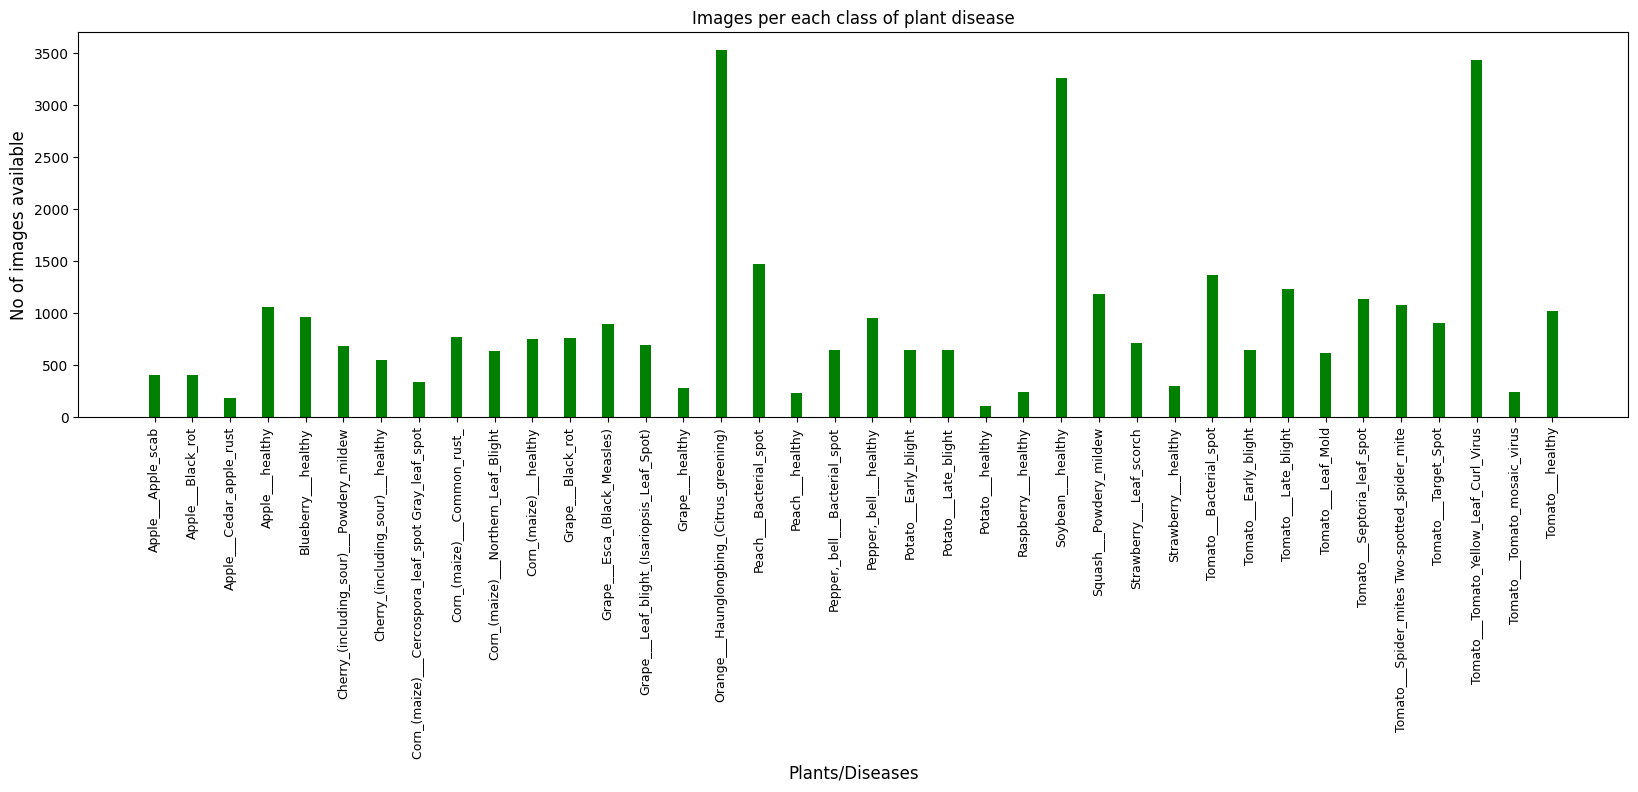

In [ ]:

index = [n for n in range(38)]
plt.figure(figsize=(20, 5))
plt.bar(index, [n for n in nums.values()], width=0.3, color='green')
plt.xlabel('Plants/Diseases', fontsize=12)
plt.ylabel('No of images available', fontsize=12)
plt.xticks(index, diseases, fontsize=9, rotation=90)
plt.title('Images per each class of plant disease')

In [ ]:
import numpy as np
class_names = train_ds.class_names
num_classes = len(class_names)

# Count the number of samples per class
count_per_class = np.zeros(num_classes, dtype=int)
for data, labels in train_ds:
    unique, counts = np.unique(labels, return_counts=True)
    for cls, count in zip(unique, counts):
        count_per_class[cls] += count

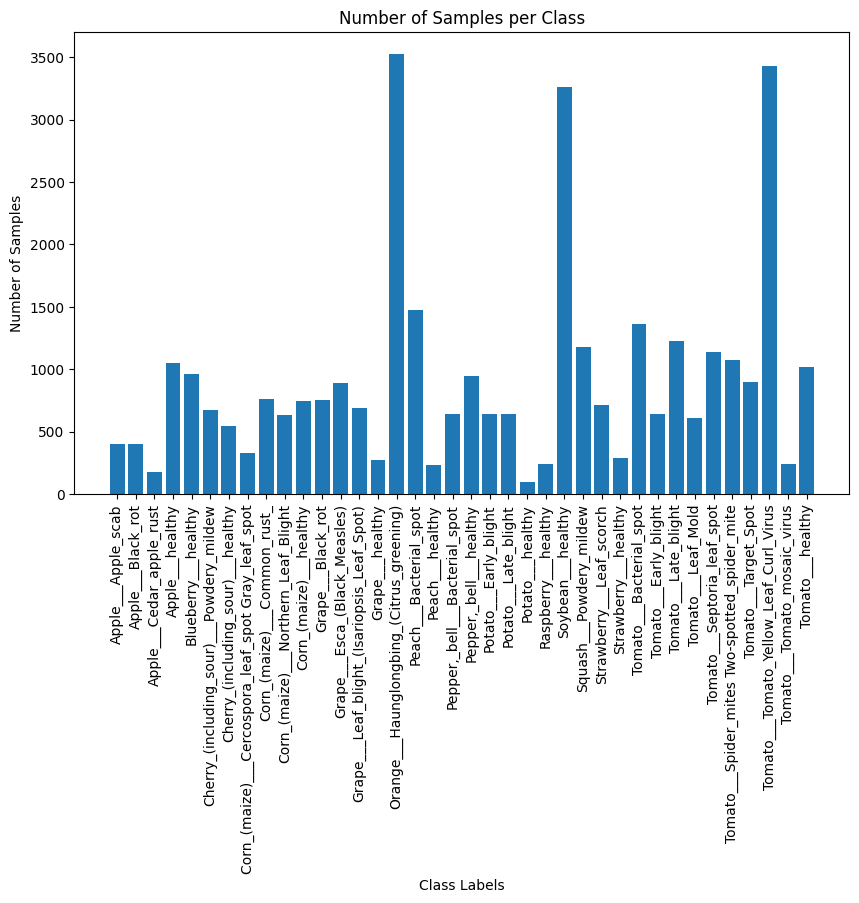

In [ ]:
fig, ax = plt.subplots(figsize=(10, 6))
ax.bar(class_names, count_per_class)
ax.set_xlabel('Class Labels')
ax.set_ylabel('Number of Samples')
ax.set_title('Number of Samples per Class')
plt.xticks(rotation=90)
plt.show()

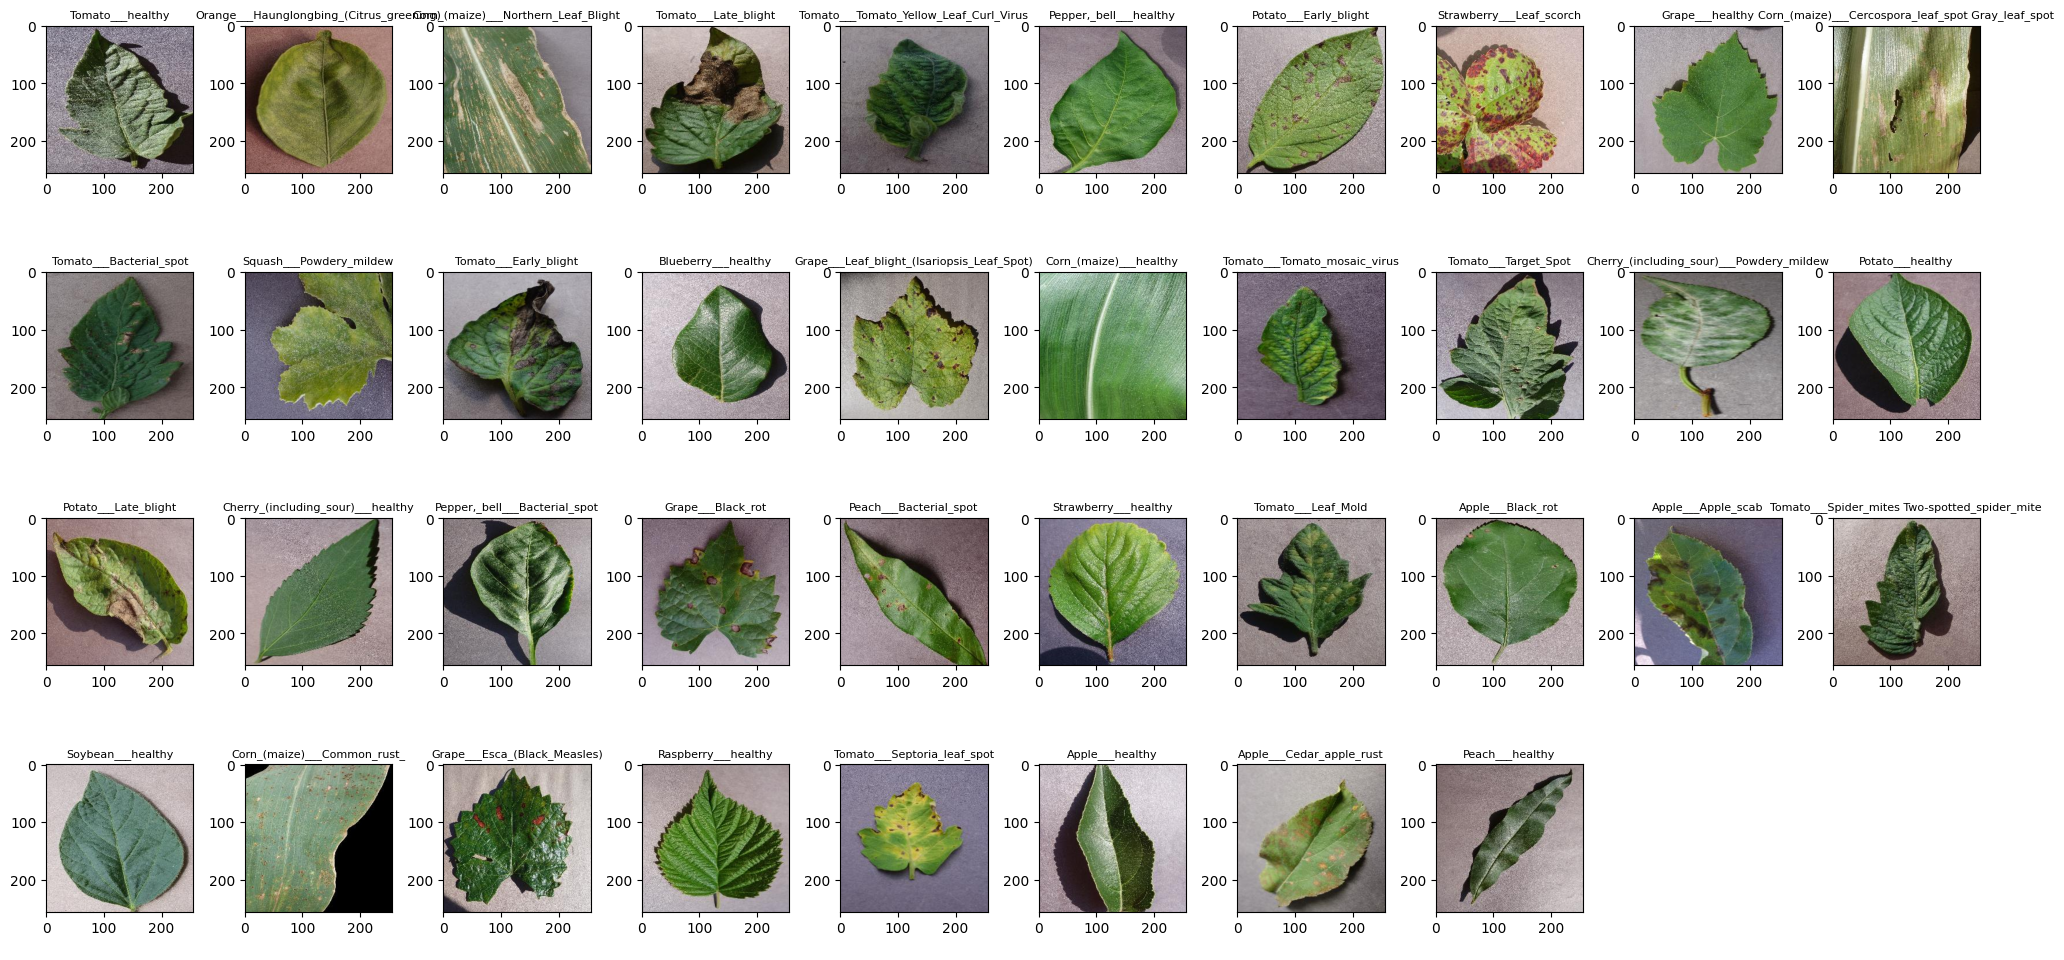

In [ ]:
import os
import matplotlib.pyplot as plt

# Assuming train_data is a list of directories in the /content/dataset/dataset/train folder
train_data = os.listdir("/content/dataset/dataset/train")

# Create a figure and axes using plt.subplots
fig, axes = plt.subplots(4, 10, figsize=(20, 10))

# Adjust the spacing between subplots
fig.subplots_adjust(wspace=0.5, hspace=0.5)  # Added here
# Flatten the axes array to iterate over individual axes
axes = axes.flatten()

# Iterate over the train_data directories and plot images
for x in range(len(train_data)):
    curr = train_data[x]
    img = os.listdir(f"/content/dataset/dataset/train/{curr}/")[0]
    result = f"/content/dataset/dataset/train/{curr}/{img}"
    axes[x].imshow(plt.imread(result), cmap="gray")
    axes[x].set_title(curr, fontsize=8)  # Reduced font size for better visibility

# Hide remaining empty axes
for ax in axes[len(train_data):]:
    ax.axis('off')

# Adjust the layout to prevent overlapping titles
plt.tight_layout()

# Show the plot
plt.show()


### **Data augment**

In [ ]:
to_augment = []
filtered_df = img_per_class[img_per_class['count'] <= 1000]
filtered_df.index

Index(['Apple___Apple_scab', 'Apple___Black_rot', 'Apple___Cedar_apple_rust',
       'Blueberry___healthy', 'Cherry_(including_sour)___Powdery_mildew',
       'Cherry_(including_sour)___healthy',
       'Corn_(maize)___Cercospora_leaf_spot Gray_leaf_spot',
       'Corn_(maize)___Common_rust_', 'Corn_(maize)___Northern_Leaf_Blight',
       'Corn_(maize)___healthy', 'Grape___Black_rot',
       'Grape___Esca_(Black_Measles)',
       'Grape___Leaf_blight_(Isariopsis_Leaf_Spot)', 'Grape___healthy',
       'Peach___healthy', 'Pepper,_bell___Bacterial_spot',
       'Pepper,_bell___healthy', 'Potato___Early_blight',
       'Potato___Late_blight', 'Potato___healthy', 'Raspberry___healthy',
       'Strawberry___Leaf_scorch', 'Strawberry___healthy',
       'Tomato___Early_blight', 'Tomato___Leaf_Mold', 'Tomato___Target_Spot',
       'Tomato___Tomato_mosaic_virus'],
      dtype='object')

In [ ]:

idx = list(filtered_df.index)

In [ ]:

import shutil
source_folder=train_data_dir
destination_folder=os.path.join("/content/dataset/dataset","to_augment")
print(destination_folder)
if not os.path.exists(destination_folder):
    os.mkdir(destination_folder)

    subdirectories = idx
    for subdirectory in subdirectories:

          subdirectory_path = os.path.join(source_folder, subdirectory)
          shutil.copytree(subdirectory_path, os.path.join(destination_folder, subdirectory))

/content/dataset/dataset/to_augment


In [ ]:

from keras.preprocessing.image import ImageDataGenerator
from collections import Counter
to_augment_dir = "/content/dataset/dataset/to_augment"
datagen = ImageDataGenerator(
    rotation_range=20,
    width_shift_range=0.2,
    height_shift_range=0.2,
    shear_range=0.2,
    zoom_range=0.2,
    horizontal_flip=True,
    # validation_split=0.2,
    fill_mode='nearest'
)
flow_generator = datagen.flow_from_directory(
    to_augment_dir,
    target_size=(224,224),
    batch_size=32,
    class_mode='categorical',
    # subset = "training",
    seed = 123 # Set seed for shuffling
)


Found 15059 images belonging to 27 classes.


In [ ]:
from PIL import Image
output_dir = to_augment_dir

In [ ]:
# Define the target number of images for each class (at least 2000)
target_images_per_class = 1100
output_dir = to_augment_dir
# Initialize counters for each class
class_counts = {class_name: 0 for class_name in flow_generator.class_indices.keys()}

while True:
    batch = flow_generator.next()
    images, labels = batch
    stop_augmentation = True

    for i, label in enumerate(labels):
        class_index = np.argmax(label)  # Get the class index from one-hot encoding
        class_name = list(flow_generator.class_indices.keys())[class_index]  # Convert index to class name

        nums[class_name] = len(os.listdir(to_augment_dir + '/' + class_name))# the numbers in train

        # Continue if the class has reached the target count
        if nums[class_name] >= target_images_per_class:
            continue

        stop_augmentation = False  # Indicate that we're still processing
        image_data = images[i]
        image_data = (image_data * 255).astype(np.uint8)
        image = Image.fromarray(image_data)

        output_dir_curr = os.path.join(output_dir, class_name)
        os.makedirs(output_dir_curr, exist_ok=True)

        class_counts[class_name] += 1  # Increment the count for the processed class
        image.save(os.path.join(output_dir_curr, f'augmented_{class_counts[class_name]}.jpeg'))  # Save the image

    # Break the loop if all classes reached the target count
    if stop_augmentation:
        break


In [ ]:
train_ds = tf.keras.preprocessing.image_dataset_from_directory(
    to_augment_dir,
    batch_size=32,
    image_size=(224,224),
    shuffle=True,
    # validation_split=0.2,  # 25% of the training data will be used for validation
    # subset="training",  # Specify subset for training
    seed = 123 # Set seed for shuffling
)
diseases = train_ds.class_names
import shutil
nums = {}
for disease in diseases:
    nums[disease] = len(os.listdir(to_augment_dir + '/' + disease))
# converting the nums dictionary to pandas dataframe passing index as plant name and number of images as column
img_per_class = pd.DataFrame(nums.values(), index=nums.keys(), columns=["count"])
to_augment = []
filtered_df = img_per_class[img_per_class['count'] <= 1000]
source_folder=to_augment_dir
destination_folder=os.path.join("/content/dataset/dataset","to_augment2")
print(destination_folder)
idx = list(filtered_df.index)
if not os.path.exists(destination_folder):
    os.mkdir(destination_folder)

    subdirectories = idx
    for subdirectory in subdirectories:

          subdirectory_path = os.path.join(source_folder, subdirectory)
          shutil.copytree(subdirectory_path, os.path.join(destination_folder, subdirectory))

Found 24417 files belonging to 27 classes.
/content/dataset/dataset/to_augment2


In [ ]:
to_augment_dir2 = "/content/dataset/dataset/to_augment2"
datagen = ImageDataGenerator(
    rotation_range=20,
    width_shift_range=0.2,
    height_shift_range=0.2,
    shear_range=0.2,
    zoom_range=0.2,
    horizontal_flip=True,
    # validation_split=0.2,
    fill_mode='nearest'
)
flow_generator = datagen.flow_from_directory(
    to_augment_dir2,
    target_size=(224,224),
    batch_size=32,
    class_mode='categorical',
    # subset = "training",
    seed = 123 # Set seed for shuffling
)
# Define the target number of images for each class (at least 2000)
target_images_per_class = 1100
output_dir = to_augment_dir
# Initialize counters for each class
class_counts = {class_name: 0 for class_name in flow_generator.class_indices.keys()}

while True:
    batch = flow_generator.next()
    images, labels = batch
    stop_augmentation = True

    for i, label in enumerate(labels):
        class_index = np.argmax(label)  # Get the class index from one-hot encoding
        class_name = list(flow_generator.class_indices.keys())[class_index]  # Convert index to class name

        nums[class_name] = len(os.listdir(to_augment_dir + '/' + class_name))# the numbers in train

        # Continue if the class has reached the target count
        if nums[class_name] >= target_images_per_class:
            continue

        stop_augmentation = False  # Indicate that we're still processing
        image_data = images[i]
        image_data = (image_data * 255).astype(np.uint8)
        image = Image.fromarray(image_data)

        output_dir_curr = os.path.join(output_dir, class_name)
        os.makedirs(output_dir_curr, exist_ok=True)

        class_counts[class_name] += 1  # Increment the count for the processed class
        image.save(os.path.join(output_dir_curr, f'augmented_{class_counts[class_name]}.jpeg'))  # Save the image

    # Break the loop if all classes reached the target count
    if stop_augmentation:
        break

Found 5717 images belonging to 10 classes.


In [ ]:
import shutil
nums = {}
for disease in diseases:
    nums[disease] = len(os.listdir(to_augment_dir + '/' + disease))
# converting the nums dictionary to pandas dataframe passing index as plant name and number of images as column
img_per_class = pd.DataFrame(nums.values(), index=nums.keys(), columns=["count"])
to_augment = []
filtered_df = img_per_class[img_per_class['count'] <= 1000]
print(filtered_df)
source_folder=to_augment_dir
destination_folder=os.path.join("/content/dataset/dataset","to_augment3")
print(destination_folder)
idx = list(filtered_df.index)
if not os.path.exists(destination_folder):
    os.mkdir(destination_folder)

    subdirectories = idx
    for subdirectory in subdirectories:

          subdirectory_path = os.path.join(source_folder, subdirectory)
          shutil.copytree(subdirectory_path, os.path.join(destination_folder, subdirectory))

to_augment_dir3 = "/content/dataset/dataset/to_augment3"
datagen = ImageDataGenerator(
    rotation_range=20,
    width_shift_range=0.2,
    height_shift_range=0.2,
    shear_range=0.2,
    zoom_range=0.2,
    horizontal_flip=True,
    # validation_split=0.2,
    fill_mode='nearest'
)
flow_generator = datagen.flow_from_directory(
    to_augment_dir3,
    target_size=(224,224),
    batch_size=32,
    class_mode='categorical',
    # subset = "training",
    seed = 123 # Set seed for shuffling
)
# Define the target number of images for each class (at least 2000)
target_images_per_class = 1100
output_dir = to_augment_dir
# Initialize counters for each class
class_counts = {class_name: 0 for class_name in flow_generator.class_indices.keys()}

while True:
    batch = flow_generator.next()
    images, labels = batch
    stop_augmentation = True

    for i, label in enumerate(labels):
        class_index = np.argmax(label)  # Get the class index from one-hot encoding
        class_name = list(flow_generator.class_indices.keys())[class_index]  # Convert index to class name

        nums[class_name] = len(os.listdir(to_augment_dir + '/' + class_name))# the numbers in train

        # Continue if the class has reached the target count
        if nums[class_name] >= target_images_per_class:
            continue

        stop_augmentation = False  # Indicate that we're still processing
        image_data = images[i]
        image_data = (image_data * 255).astype(np.uint8)
        image = Image.fromarray(image_data)

        output_dir_curr = os.path.join(output_dir, class_name)
        os.makedirs(output_dir_curr, exist_ok=True)

        class_counts[class_name] += 1  # Increment the count for the processed class
        image.save(os.path.join(output_dir_curr, f'augmented_{class_counts[class_name]}.jpeg'))  # Save the image

    # Break the loop if all classes reached the target count
    if stop_augmentation:
        break

                          count
Apple___Cedar_apple_rust    845
Potato___healthy            464
/content/dataset/dataset/to_augment3
Found 1309 images belonging to 2 classes.


In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import os
nums = {}
for disease in diseases:
    nums[disease] = len(os.listdir(to_augment_dir + '/' + disease))
# converting the nums dictionary to pandas dataframe passing index as plant name and number of images as column
img_per_class = pd.DataFrame(nums.values(), index=nums.keys(), columns=["count"])
img_per_class

count
Apple___Apple_scab                                   1100
Apple___Black_rot                                    1100
Apple___Cedar_apple_rust                             1100
Blueberry___healthy                                  1100
Cherry_(including_sour)___Powdery_mildew             1100
Cherry_(including_sour)___healthy                    1100
Corn_(maize)___Cercospora_leaf_spot Gray_leaf_spot   1100
Corn_(maize)___Common_rust_                          1100
Corn_(maize)___Northern_Leaf_Blight                  1100
Corn_(maize)___healthy                               1100
Grape___Black_rot                                    1100
Grape___Esca_(Black_Measles)                         1100
Grape___Leaf_blight_(Isariopsis_Leaf_Spot)           1100
Grape___healthy                                      1100
Peach___healthy                                      1100
Pepper,_bell___Bacterial_spot                        1100
Pepper,_bell___healthy                               1100
Potato___Early_blight                                1100
Potato___Late_blight                                 1100
Potato___healthy                                     1100
Raspberry___healthy                                  1100
Strawberry___Leaf_scorch                             1100
Strawberry___healthy                                 1100
Tomato___Early_blight                                1100
Tomato___Leaf_Mold                                   1100
Tomato___Target_Spot                                 1100
Tomato___Tomato_mosaic_virus                         1100

Text(0.5, 1.0, 'Images augmented per each class of plant disease')

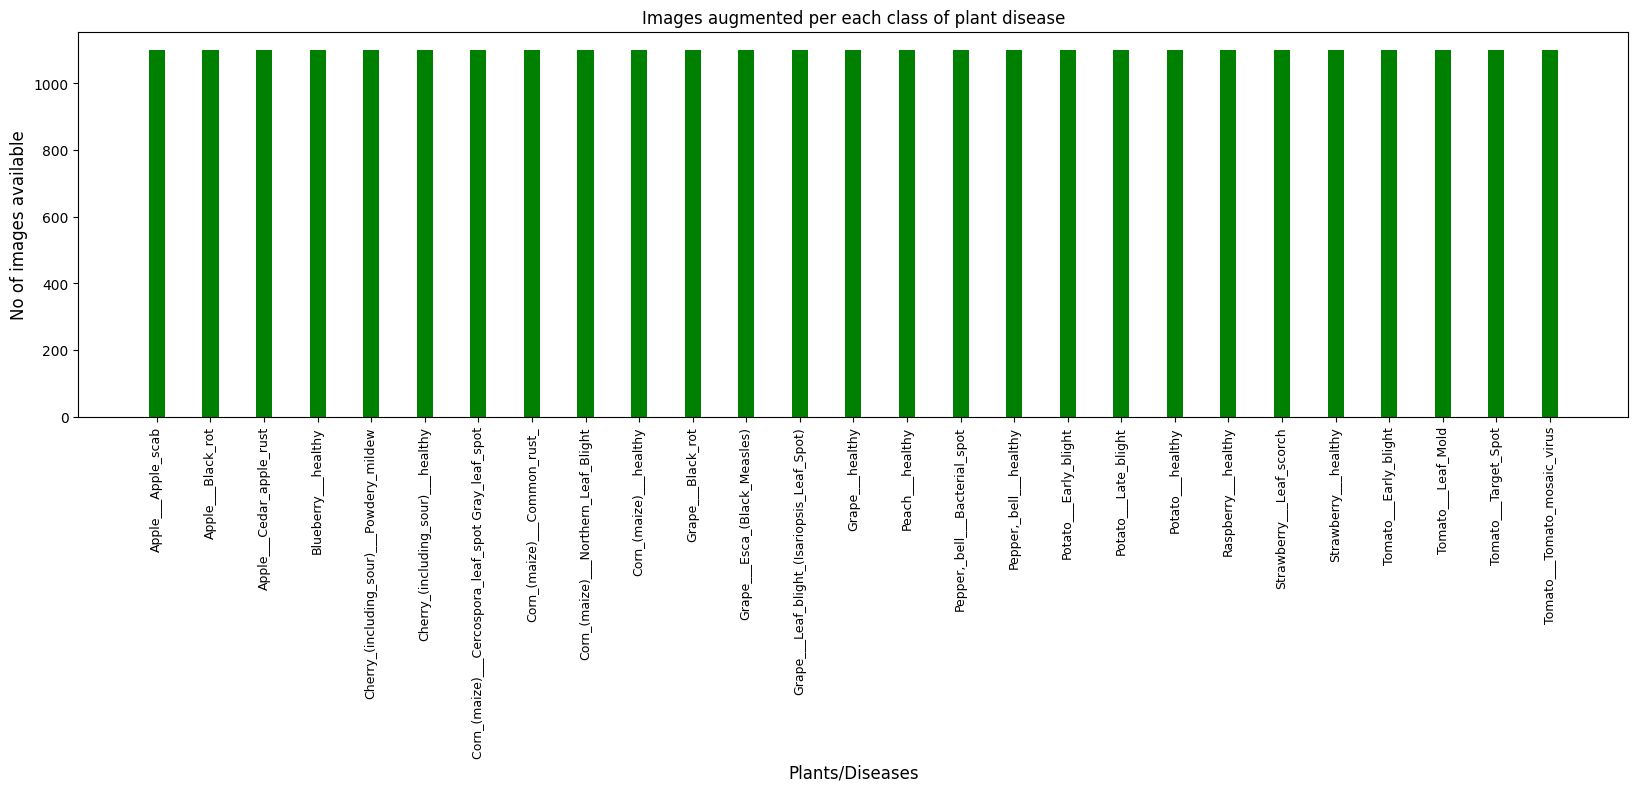

In [ ]:
index = [n for n in range(27)]
plt.figure(figsize=(20, 5))
plt.bar(index, [n for n in nums.values()], width=0.3, color='green')
plt.xlabel('Plants/Diseases', fontsize=12)
plt.ylabel('No of images available', fontsize=12)
plt.xticks(index, diseases, fontsize=9, rotation=90)
plt.title('Images augmented per each class of plant disease')

In [ ]:
import random
nums = {}
train_ds = tf.keras.preprocessing.image_dataset_from_directory(
    train_data_dir,
    batch_size=32,
    image_size=(224,224),
    shuffle=True,
    # validation_split=0.2,  # 25% of the training data will be used for validation
    # subset="training",  # Specify subset for training
    seed = 123 # Set seed for shuffling
)
diseases = train_ds.class_names
for disease in diseases:
    nums[disease] = len(os.listdir(train_data_dir + '/' + disease))
# converting the nums dictionary to pandas dataframe passing index as plant name and number of images as column
img_per_class = pd.DataFrame(nums.values(), index=nums.keys(), columns=["count"])
to_augment = []
filtered_df = img_per_class[img_per_class['count'] > 1000]
print(filtered_df)
source_folder=train_data_dir
destination_folder=os.path.join("/content/dataset/dataset","to_augment")
print(destination_folder)
idx = list(filtered_df.index)
num_samples_per_class = 1500

for class_name in filtered_df.index:
    source_dir = os.path.join(train_data_dir, class_name)
    destination_dir = os.path.join(destination_folder, class_name)
    if not os.path.exists(destination_dir):
        # Create the directory if it doesn't exist
        os.makedirs(destination_dir)

        # Your code to copy files or perform other actions in the destination directory
        print(f"Created directory: {destination_dir}")
    else:
        # Directory already exists, skip creation
        print(f"Directory already exists: {destination_dir}")
        continue

    # List all images in the source directory
    all_images = os.listdir(source_dir)

    # Randomly select num_samples_per_class images from the source directory
    selected_images = random.sample(all_images, min(num_samples_per_class, len(all_images)))

    # Copy the selected images to the destination directory
    for image_name in selected_images:
        source_path = os.path.join(source_dir, image_name)
        dest_path = os.path.join(destination_dir, image_name)
        shutil.copyfile(source_path, dest_path)

Found 34781 files belonging to 38 classes.
                                               count
Apple___healthy                                 1053
Orange___Haunglongbing_(Citrus_greening)        3525
Peach___Bacterial_spot                          1471
Soybean___healthy                               3258
Squash___Powdery_mildew                         1175
Tomato___Bacterial_spot                         1362
Tomato___Late_blight                            1223
Tomato___Septoria_leaf_spot                     1134
Tomato___Spider_mites Two-spotted_spider_mite   1073
Tomato___Tomato_Yellow_Leaf_Curl_Virus          3429
Tomato___healthy                                1019
/content/dataset/dataset/to_augment
Created directory: /content/dataset/dataset/to_augment/Apple___healthy
Created directory: /content/dataset/dataset/to_augment/Orange___Haunglongbing_(Citrus_greening)
Created directory: /content/dataset/dataset/to_augment/Peach___Bacterial_spot
Created directory: /content/dataset/data

#### Data distribution before augmentation

Text(0.5, 1.0, 'Images augmented per each class of plant disease')

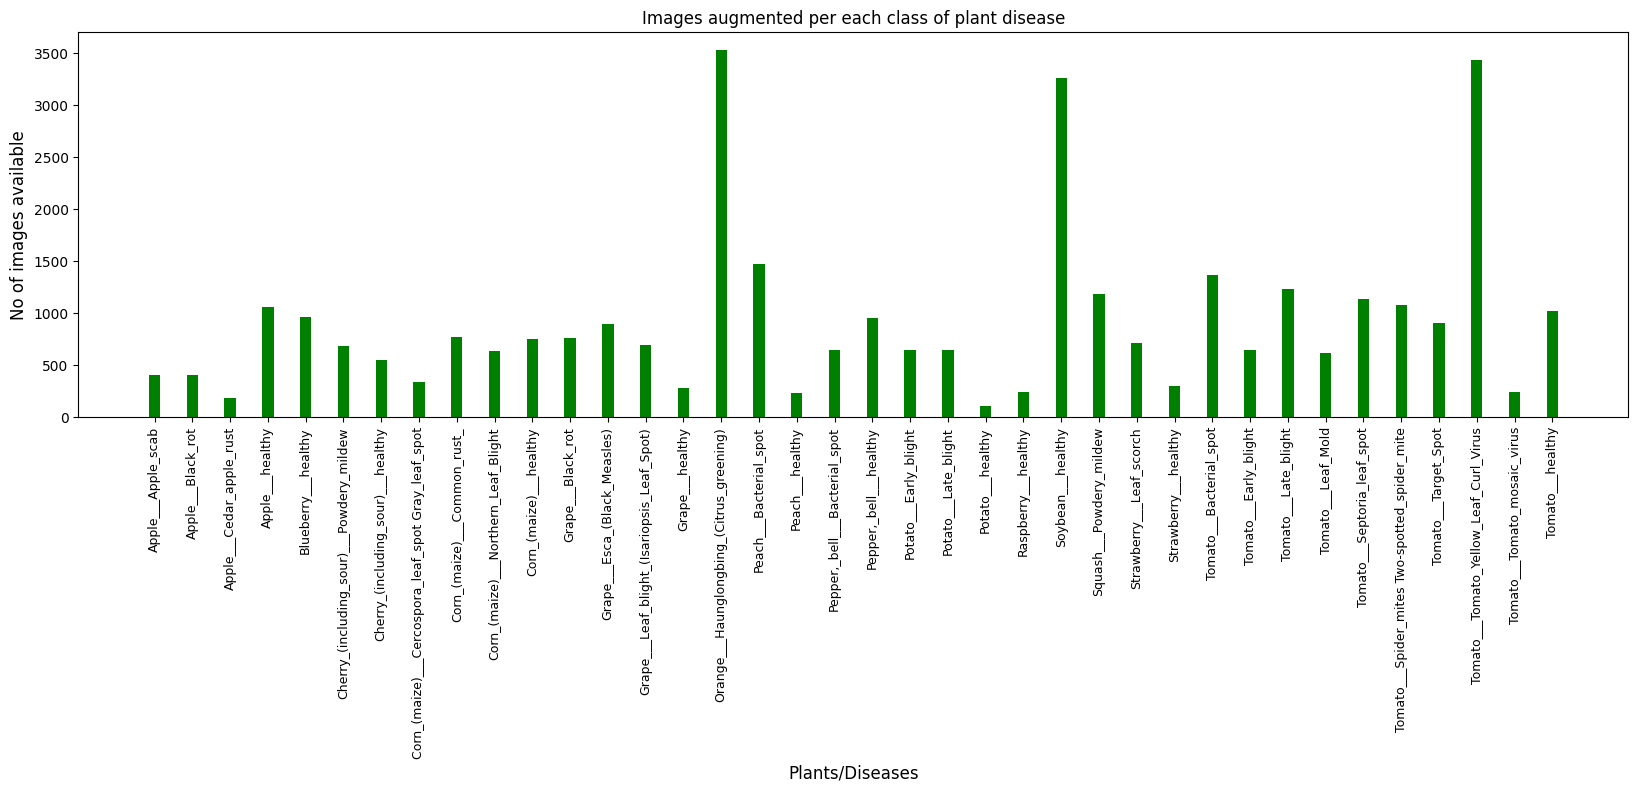

In [ ]:
nums = {}
for disease in diseases:
    nums[disease] = len(os.listdir(train_data_dir + '/' + disease))
# converting the nums dictionary to pandas dataframe passing index as plant name and number of images as column
img_per_class = pd.DataFrame(nums.values(), index=nums.keys(), columns=["count"])
index = [n for n in range(38)]
plt.figure(figsize=(20, 5))
plt.bar(index, [n for n in nums.values()], width=0.3, color='green')
plt.xlabel('Plants/Diseases', fontsize=12)
plt.ylabel('No of images available', fontsize=12)
plt.xticks(index, diseases, fontsize=9, rotation=90)
plt.title('Images augmented per each class of plant disease')

#### Data distribution after augmentation

Text(0.5, 1.0, 'Images augmented per each class of plant disease')

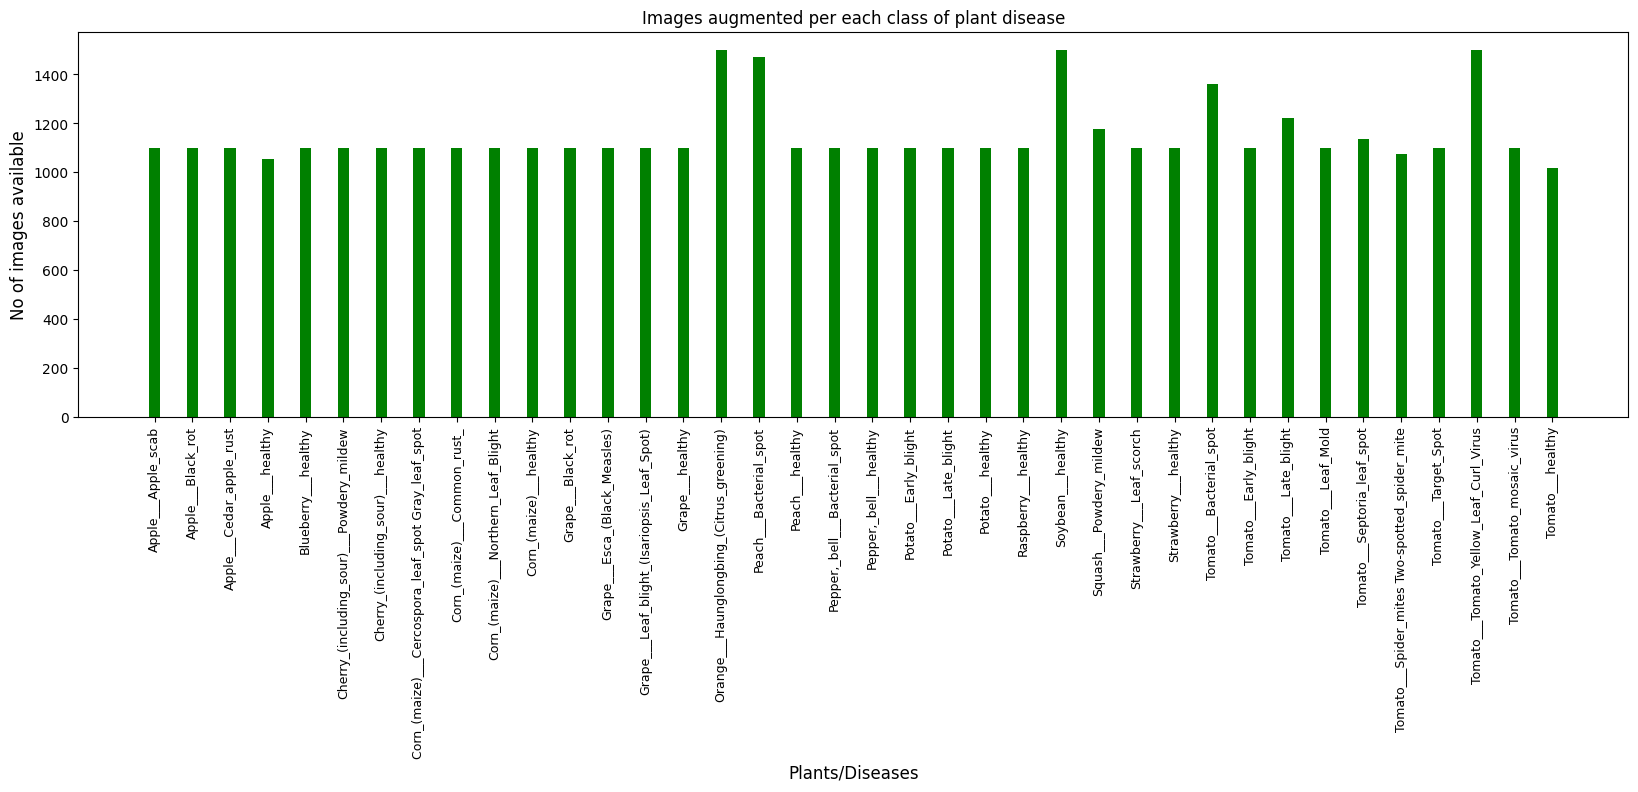

In [ ]:
nums = {}
for disease in diseases:
    nums[disease] = len(os.listdir(to_augment_dir + '/' + disease))
# converting the nums dictionary to pandas dataframe passing index as plant name and number of images as column
img_per_class = pd.DataFrame(nums.values(), index=nums.keys(), columns=["count"])
index = [n for n in range(38)]
plt.figure(figsize=(20, 5))
plt.bar(index, [n for n in nums.values()], width=0.3, color='green')
plt.xlabel('Plants/Diseases', fontsize=12)
plt.ylabel('No of images available', fontsize=12)
plt.xticks(index, diseases, fontsize=9, rotation=90)
plt.title('Images augmented per each class of plant disease')

In [ ]:
# Define Generators
zoom_datagen = ImageDataGenerator(zoom_range = 0.2)
shear_datagen = ImageDataGenerator(shear_range = 0.2)
flip_datagen = ImageDataGenerator(horizontal_flip = True)
rotation_datagen = ImageDataGenerator(rotation_range=20)
width_shift_datagen = ImageDataGenerator(width_shift_range=0.2)
height_shift_datagen = ImageDataGenerator(height_shift_range=0.2)
comb_datagen = ImageDataGenerator(
    rotation_range=20,
    width_shift_range=0.2,
    height_shift_range=0.2,
    shear_range=0.2,
    zoom_range=0.2,
    horizontal_flip=True,
    # validation_split=0.2,
    fill_mode='nearest'
)

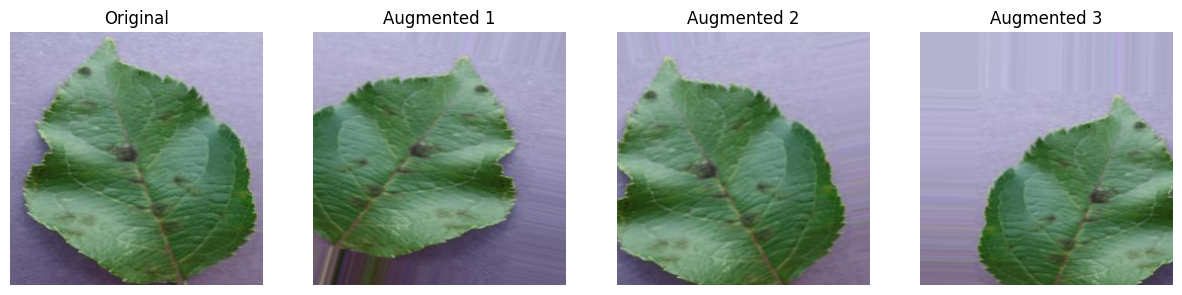

In [ ]:
from keras.preprocessing.image import load_img
from keras.preprocessing.image import img_to_array
from numpy import expand_dims
image = load_img("/content/dataset/dataset/train/Apple___Apple_scab/00075aa8-d81a-4184-8541-b692b78d398a___FREC_Scab 3335.JPG")

# Generate augmented images
augmented_images = comb_datagen.flow(np.expand_dims(image, axis=0), batch_size=1)

# Display the original image and 3 augmented examples
fig, ax = plt.subplots(1, 4, figsize=(15, 5))

# Original image
ax[0].imshow(image)
ax[0].set_title('Original')
ax[0].axis('off')

# Augmented images
for i in range(3):
    augmented_image = next(augmented_images)[0].astype('uint8')
    ax[i+1].imshow(augmented_image)
    ax[i+1].set_title(f'Augmented {i+1}')
    ax[i+1].axis('off')

plt.show()

### Model

In [1]:
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import pandas as pd
import cv2

import keras
from keras import regularizers
from keras.preprocessing import image
# from keras.models import Sequential
from keras.layers import Conv2D, MaxPool2D, Flatten, Dense, Dropout, BatchNormalization, LeakyReLU, Activation

import tensorflow as tf
from tensorflow.keras import optimizers
from tensorflow.keras.models import Sequential
from tensorflow.keras.datasets import mnist
from tensorflow.keras.applications import VGG16, InceptionResNetV2
from tensorflow.keras.optimizers import Adam,RMSprop,SGD,Adamax
from tensorflow.keras.callbacks import Callback, EarlyStopping, ReduceLROnPlateau

In [ ]:
early_stopping = EarlyStopping(
    monitor='val_accuracy',
    min_delta=0.00005,
    patience=11,
    verbose=1,
    restore_best_weights=True,
)

lr_scheduler = ReduceLROnPlateau(
    monitor='val_accuracy',
    factor=0.5,
    patience=7,
    min_lr=1e-7,
    verbose=1,
)

callbacks = [
    early_stopping,
    lr_scheduler,
]

In [ ]:
import tensorflow as tf
train_data_dir_no_aug = "/content/dataset/dataset/train"
valid_data_dir_no_aug = "/content/dataset/dataset/valid"
test_data_dir_no_aug = "/content/dataset/dataset/test"
train_ds_no_augment = tf.keras.preprocessing.image_dataset_from_directory(
    train_data_dir_no_aug,
    batch_size=32,
    image_size=(224,224),
    shuffle=True,
    label_mode="categorical",
    # validation_split=0.2,  # 25% of the training data will be used for validation
    # subset="training",  # Specify subset for training
    seed = 123 # Set seed for shuffling
)
diseases = train_ds.class_names
val_ds = tf.keras.preprocessing.image_dataset_from_directory(
    valid_data_dir_no_aug,  # Use the same directory for validation
    batch_size=32,
    image_size=(224,224),
    shuffle=True,
    label_mode="categorical",
    # validation_split=0.2,  # 25% of the training data will be used for validation
    # subset="validation" , # Specify subset for validation
    seed = 123
)

Found 34781 files belonging to 38 classes.
Found 8675 files belonging to 38 classes.


In [2]:
model = keras.Sequential([
    keras.layers.Rescaling(scale = 1/255 , input_shape =(224,224,3) ) ,

    # keras.layers.Conv2D(256 , (3,3) , activation = 'relu'),
    # keras.layers.MaxPool2D((2,2))                     ,
    # keras.layers.Dropout(0.2),

    keras.layers.Conv2D(128 , (3,3) , activation = 'relu') ,
    keras.layers.MaxPool2D((2,2)) ,
    keras.layers.Dropout(0.2),

    keras.layers.Conv2D(64 , (3,3) , activation = 'relu') ,
    keras.layers.MaxPool2D((2,2)) ,
    keras.layers.Dropout(0.2),

    keras.layers.Conv2D(64 , (3,3) , activation = 'relu') ,
    keras.layers.MaxPool2D((2,2)) ,
    keras.layers.Dropout(0.2),

    keras.layers.Conv2D(32 , (3,3) , activation = 'relu') ,
    keras.layers.MaxPool2D((2,2)) ,

    # fully connected layers

    keras.layers.Flatten(),
    keras.layers.Dense(128,activation = 'relu'),
    keras.layers.Dense(64,activation = 'relu'),
    keras.layers.Dense(38,activation ='softmax')

])
model.compile(
    optimizer = 'adam' ,
    loss = 'categorical_crossentropy',
    metrics = 'accuracy'
)

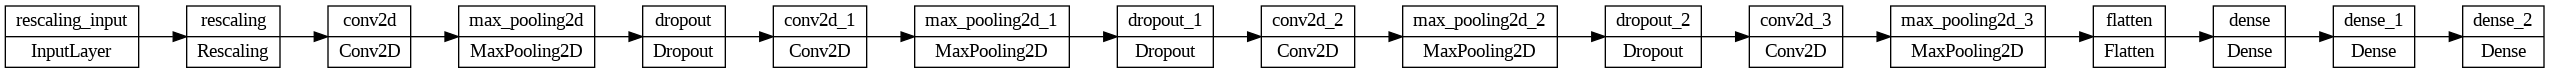

In [5]:
from tensorflow.keras.utils import plot_model
plot_model(model,show_layer_names=True, rankdir='LR')

In [ ]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 rescaling (Rescaling)       (None, 224, 224, 3)       0         
                                                                 
 conv2d (Conv2D)             (None, 222, 222, 128)     3584      
                                                                 
 max_pooling2d (MaxPooling2  (None, 111, 111, 128)     0         
 D)                                                              
                                                                 
 dropout (Dropout)           (None, 111, 111, 128)     0         
                                                                 
 conv2d_1 (Conv2D)           (None, 109, 109, 64)      73792     
                                                                 
 max_pooling2d_1 (MaxPoolin  (None, 54, 54, 64)        0         
 g2D)                                                   

In [ ]:
import tensorflow as tf
train_ds = tf.keras.preprocessing.image_dataset_from_directory(
    to_augment_dir,
    batch_size=32,
    image_size=(224,224),
    shuffle=True,
    label_mode="categorical",
    # validation_split=0.2,  # 25% of the training data will be used for validation
    # subset="training",  # Specify subset for training
    seed = 123 # Set seed for shuffling
)
diseases = train_ds.class_names
val_ds = tf.keras.preprocessing.image_dataset_from_directory(
    valid_data_dir,  # Use the same directory for validation
    batch_size=32,
    image_size=(224,224),
    shuffle=True,
    label_mode="categorical",
    # validation_split=0.2,  # 25% of the training data will be used for validation
    # subset="validation" , # Specify subset for validation
    seed = 123
)

Found 43710 files belonging to 38 classes.
Found 8675 files belonging to 38 classes.


#### Training with no augmentation

In [ ]:
from tensorflow import keras

model = keras.Sequential([
    keras.layers.Rescaling(scale=1/255, input_shape=(224, 224, 3)),
    # keras.layers.Conv2D(256, (3, 3), activation='relu'),
    # keras.layers.MaxPool2D((2, 2)),
    # keras.layers.Dropout(0.2),
    keras.layers.Conv2D(128, (3, 3), activation='relu'),
    keras.layers.MaxPool2D((2, 2)),
    keras.layers.Dropout(0.2),
    keras.layers.Conv2D(64, (3, 3), activation='relu'),
    keras.layers.MaxPool2D((2, 2)),
    keras.layers.Dropout(0.2),
    keras.layers.Conv2D(64, (3, 3), activation='relu'),
    keras.layers.MaxPool2D((2, 2)),
    keras.layers.Dropout(0.2),
    keras.layers.Conv2D(32, (3, 3), activation='relu'),
    keras.layers.MaxPool2D((2, 2)),
    keras.layers.Flatten(),
    keras.layers.Dense(128, activation='relu'),
    keras.layers.Dense(64, activation='relu'),
    keras.layers.Dense(38, activation='softmax')  # Changed activation to softmax
])

model.compile(
    optimizer='adam',
    loss='categorical_crossentropy',  # Changed loss function
    metrics=['accuracy']  # Changed metrics format
)


In [ ]:
history = model.fit(train_ds_no_augment , epochs = 15, validation_data=val_ds)

Epoch 1/15
1087/1087 [==============================] - 278s 254ms/step - loss: 1.7780 - accuracy: 0.5020 - val_loss: 1.0666 - val_accuracy: 0.6873
Epoch 2/15
1087/1087 [==============================] - 272s 250ms/step - loss: 0.7922 - accuracy: 0.7530 - val_loss: 0.6171 - val_accuracy: 0.8172
Epoch 3/15
1087/1087 [==============================] - 269s 248ms/step - loss: 0.5219 - accuracy: 0.8326 - val_loss: 0.4878 - val_accuracy: 0.8482
Epoch 4/15
1087/1087 [==============================] - 269s 247ms/step - loss: 0.4004 - accuracy: 0.8707 - val_loss: 0.5331 - val_accuracy: 0.8435
Epoch 5/15
1087/1087 [==============================] - 268s 246ms/step - loss: 0.3293 - accuracy: 0.8911 - val_loss: 0.3905 - val_accuracy: 0.8773
Epoch 6/15
1087/1087 [==============================] - 268s 247ms/step - loss: 0.2700 - accuracy: 0.9094 - val_loss: 0.3637 - val_accuracy: 0.8866
Epoch 7/15
1087/1087 [==============================] - 268s 246ms/step - loss: 0.2397 - accuracy: 0.9191 - val_

In [ ]:
history = model.fit(train_ds_no_augment , epochs = 10, validation_data=val_ds)

Epoch 1/10
1087/1087 [==============================] - 290s 259ms/step - loss: 1.7578 - accuracy: 0.5013 - val_loss: 1.0893 - val_accuracy: 0.6855
Epoch 2/10
1087/1087 [==============================] - 274s 252ms/step - loss: 0.8183 - accuracy: 0.7438 - val_loss: 0.6469 - val_accuracy: 0.8135
Epoch 3/10
1087/1087 [==============================] - 269s 247ms/step - loss: 0.5282 - accuracy: 0.8319 - val_loss: 0.4613 - val_accuracy: 0.8614
Epoch 4/10
1087/1087 [==============================] - 269s 247ms/step - loss: 0.3832 - accuracy: 0.8749 - val_loss: 0.4029 - val_accuracy: 0.8702
Epoch 5/10
1087/1087 [==============================] - 269s 247ms/step - loss: 0.3055 - accuracy: 0.8976 - val_loss: 0.4210 - val_accuracy: 0.8648
Epoch 6/10
1087/1087 [==============================] - 266s 244ms/step - loss: 0.2586 - accuracy: 0.9138 - val_loss: 0.6941 - val_accuracy: 0.8017
Epoch 7/10
1087/1087 [==============================] - 267s 245ms/step - loss: 0.2194 - accuracy: 0.9248 - val_

#### Evaluation without augmentation

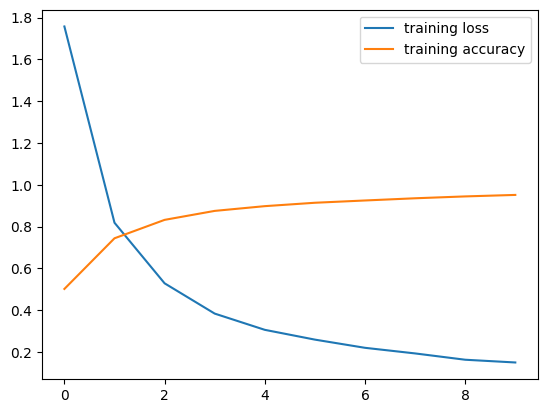

In [ ]:
plt.plot(history.history['loss'], label = 'training loss')
plt.plot(history.history['accuracy'], label = 'training accuracy')
plt.legend()

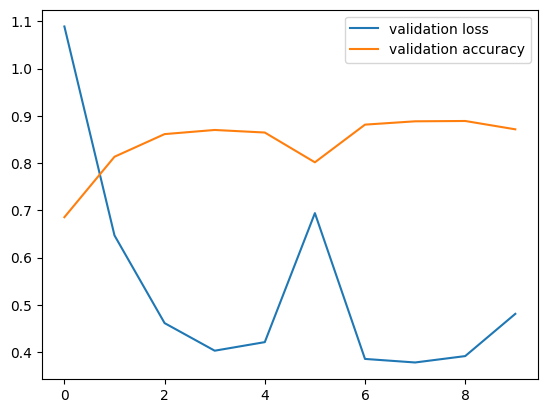

In [ ]:
plt.plot(history.history['val_loss'], label = 'validation loss')
plt.plot(history.history['val_accuracy'], label = 'validation accuracy')
plt.legend()

In [ ]:
labels = []
predictions = []
for x,y in val_ds:
    labels.append(list(y.numpy()))
    predictions.append(tf.argmax(model.predict(x, verbose=0),1).numpy())

In [ ]:
import itertools
predictions = list(itertools.chain.from_iterable(predictions))
labels = list(itertools.chain.from_iterable(labels))

In [ ]:
labels = [list(label).index(1) for label in labels]

In [ ]:
from sklearn.metrics import classification_report
classification_scores = classification_report(labels, predictions)

In [ ]:
print(classification_scores)

              precision    recall  f1-score   support

           0       0.76      0.55      0.64       100
           1       0.89      0.71      0.79        99
           2       0.57      0.59      0.58        44
           3       0.79      0.92      0.85       263
           4       0.89      0.93      0.91       240
           5       0.96      0.89      0.92       168
           6       0.99      0.62      0.76       136
           7       0.54      0.78      0.64        82
           8       0.98      0.99      0.99       190
           9       0.74      0.85      0.79       157
          10       0.96      0.99      0.98       186
          11       0.85      0.83      0.84       188
          12       0.87      0.95      0.91       221
          13       0.99      0.85      0.92       172
          14       0.92      0.87      0.89        67
          15       0.99      0.97      0.98       881
          16       0.86      0.91      0.89       367
          17       0.94    

<Figure size 2000x500 with 0 Axes>

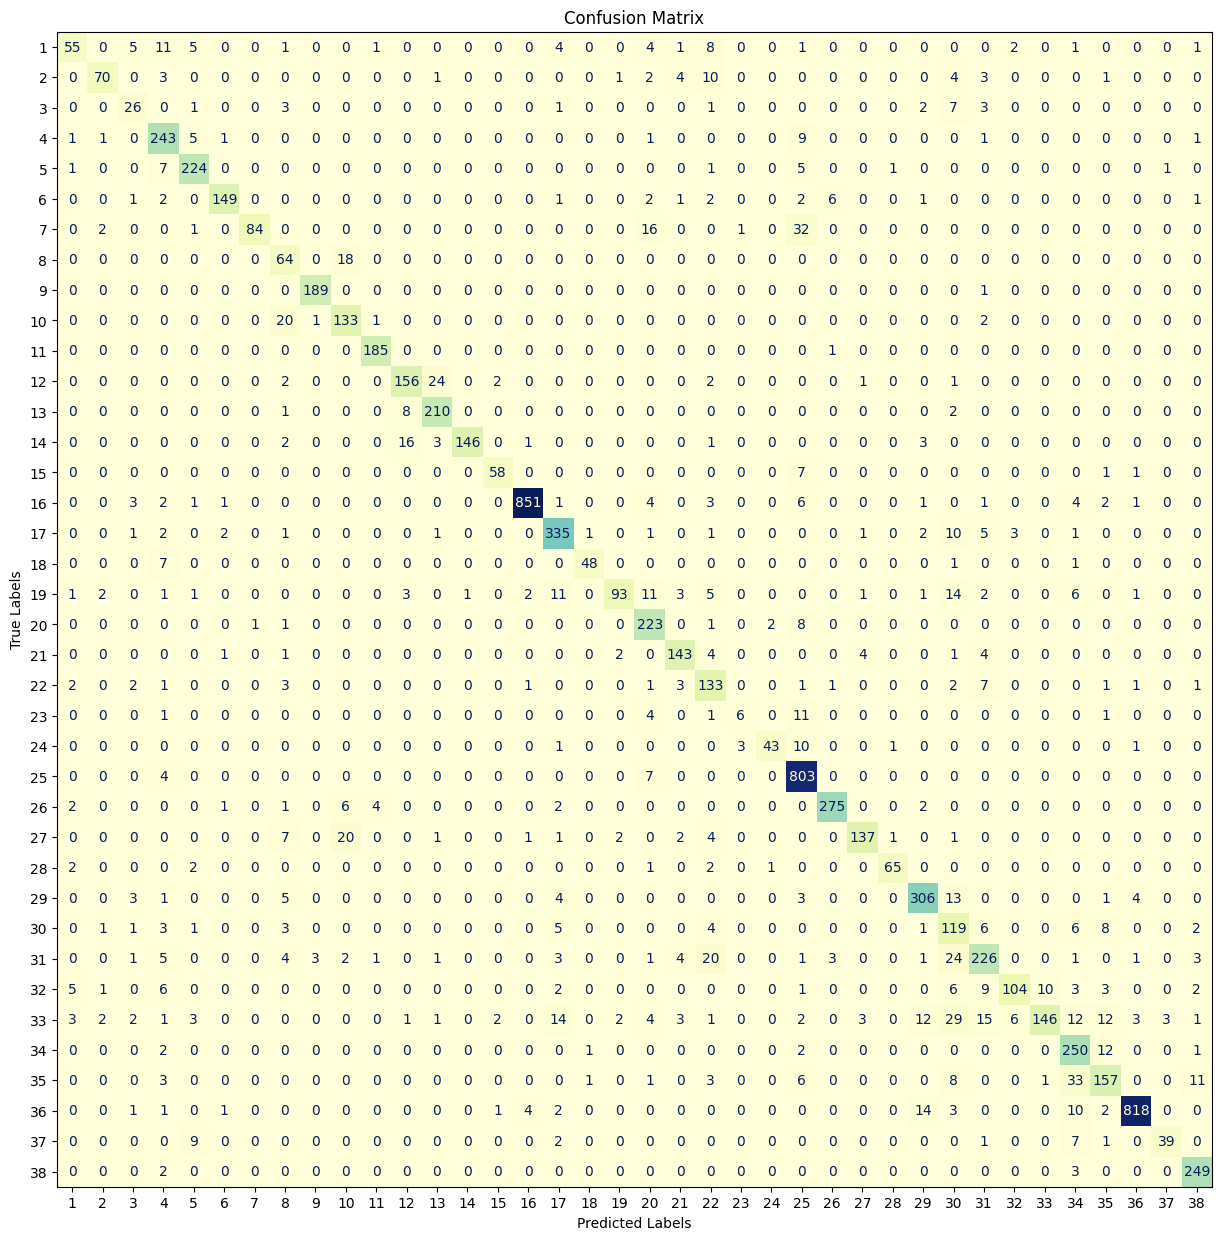

In [ ]:
from sklearn.metrics import precision_score, accuracy_score, recall_score, confusion_matrix, ConfusionMatrixDisplay
plt.figure(figsize= (20,5))
cm = confusion_matrix(labels, predictions)
disp = ConfusionMatrixDisplay(confusion_matrix=cm,
                              display_labels=list(range(1,39)))
fig, ax = plt.subplots(figsize=(15,15))
disp.plot(ax=ax,colorbar= False,cmap = 'YlGnBu')
plt.title("Confusion Matrix")
plt.xlabel('Predicted Labels')
plt.ylabel('True Labels')
plt.show()

#### Training with augmentation

In [ ]:
model = keras.Sequential([
    keras.layers.Rescaling(scale = 1/255 , input_shape =(224,224,3) ) ,

    # keras.layers.Conv2D(256 , (3,3) , activation = 'relu'),
    # keras.layers.MaxPool2D((2,2))                     ,
    # keras.layers.Dropout(0.2),

    keras.layers.Conv2D(128 , (3,3) , activation = 'relu') ,
    keras.layers.MaxPool2D((2,2)) ,
    keras.layers.Dropout(0.2),

    keras.layers.Conv2D(64 , (3,3) , activation = 'relu') ,
    keras.layers.MaxPool2D((2,2)) ,
    keras.layers.Dropout(0.2),

    keras.layers.Conv2D(64 , (3,3) , activation = 'relu') ,
    keras.layers.MaxPool2D((2,2)) ,
    keras.layers.Dropout(0.2),

    keras.layers.Conv2D(32 , (3,3) , activation = 'relu') ,
    keras.layers.MaxPool2D((2,2)) ,

    # fully connected layers

    keras.layers.Flatten(),
    keras.layers.Dense(128,activation = 'relu'),
    keras.layers.Dense(64,activation = 'relu'),
    keras.layers.Dense(38,activation ='softmax')

])
model.compile(
    optimizer = 'adam' ,
    loss = 'categorical_crossentropy',
    metrics = 'accuracy'
)

In [ ]:
history = model.fit(train_ds , epochs = 10, validation_data=val_ds)

Epoch 1/15
1366/1366 [==============================] - 334s 240ms/step - loss: 2.5599 - accuracy: 0.2660 - val_loss: 1.4185 - val_accuracy: 0.5809
Epoch 2/15
1366/1366 [==============================] - 325s 238ms/step - loss: 1.5284 - accuracy: 0.5248 - val_loss: 0.7672 - val_accuracy: 0.7645
Epoch 3/15
1366/1366 [==============================] - 325s 238ms/step - loss: 1.2271 - accuracy: 0.6073 - val_loss: 0.5691 - val_accuracy: 0.8272
Epoch 4/15
1366/1366 [==============================] - 323s 237ms/step - loss: 1.0746 - accuracy: 0.6518 - val_loss: 0.4952 - val_accuracy: 0.8478
Epoch 5/15
1366/1366 [==============================] - 322s 235ms/step - loss: 0.9881 - accuracy: 0.6767 - val_loss: 0.4705 - val_accuracy: 0.8590
Epoch 6/15
1366/1366 [==============================] - 320s 234ms/step - loss: 0.9155 - accuracy: 0.6966 - val_loss: 0.4457 - val_accuracy: 0.8657
Epoch 7/15
1366/1366 [==============================] - 321s 235ms/step - loss: 0.8622 - accuracy: 0.7140 - val_

#### Evaluation with augmentation

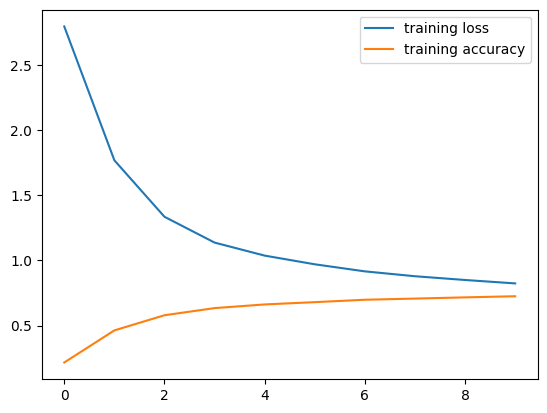

In [ ]:
plt.plot(history.history['loss'], label = 'training loss')
plt.plot(history.history['accuracy'], label = 'training accuracy')
plt.legend()

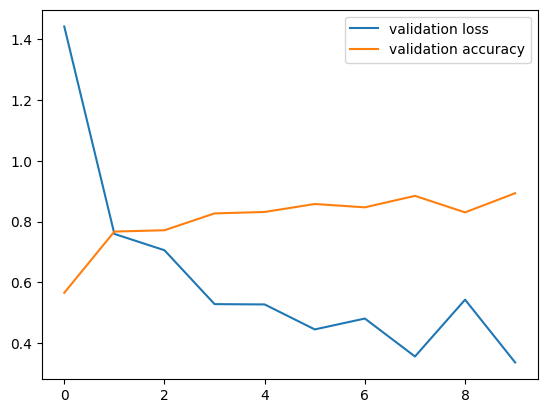

In [ ]:
plt.plot(history.history['val_loss'], label = 'validation loss')
plt.plot(history.history['val_accuracy'], label = 'validation accuracy')
plt.legend()

In [ ]:
labels = []
predictions = []
for x,y in val_ds:
    labels.append(list(y.numpy()))
    predictions.append(tf.argmax(model.predict(x, verbose=0),1).numpy())

In [ ]:
import itertools
predictions = list(itertools.chain.from_iterable(predictions))
labels = list(itertools.chain.from_iterable(labels))

In [ ]:
labels = [list(label).index(1) for label in labels]

In [ ]:
from sklearn.metrics import classification_report
classification_scores = classification_report(labels, predictions)

In [ ]:
print(classification_scores)

              precision    recall  f1-score   support

           0       0.64      0.85      0.73       100
           1       0.91      0.91      0.91        99
           2       0.68      0.95      0.79        44
           3       0.72      0.97      0.82       263
           4       0.95      0.87      0.91       240
           5       0.81      0.88      0.84       168
           6       0.84      0.98      0.90       136
           7       0.79      0.70      0.74        82
           8       0.98      1.00      0.99       190
           9       0.84      0.87      0.85       157
          10       0.87      1.00      0.93       186
          11       0.82      0.95      0.88       188
          12       0.99      0.83      0.91       221
          13       0.95      0.93      0.94       172
          14       0.97      0.93      0.95        67
          15       0.97      0.96      0.96       881
          16       0.93      0.83      0.88       367
          17       0.94    

<Figure size 2000x500 with 0 Axes>

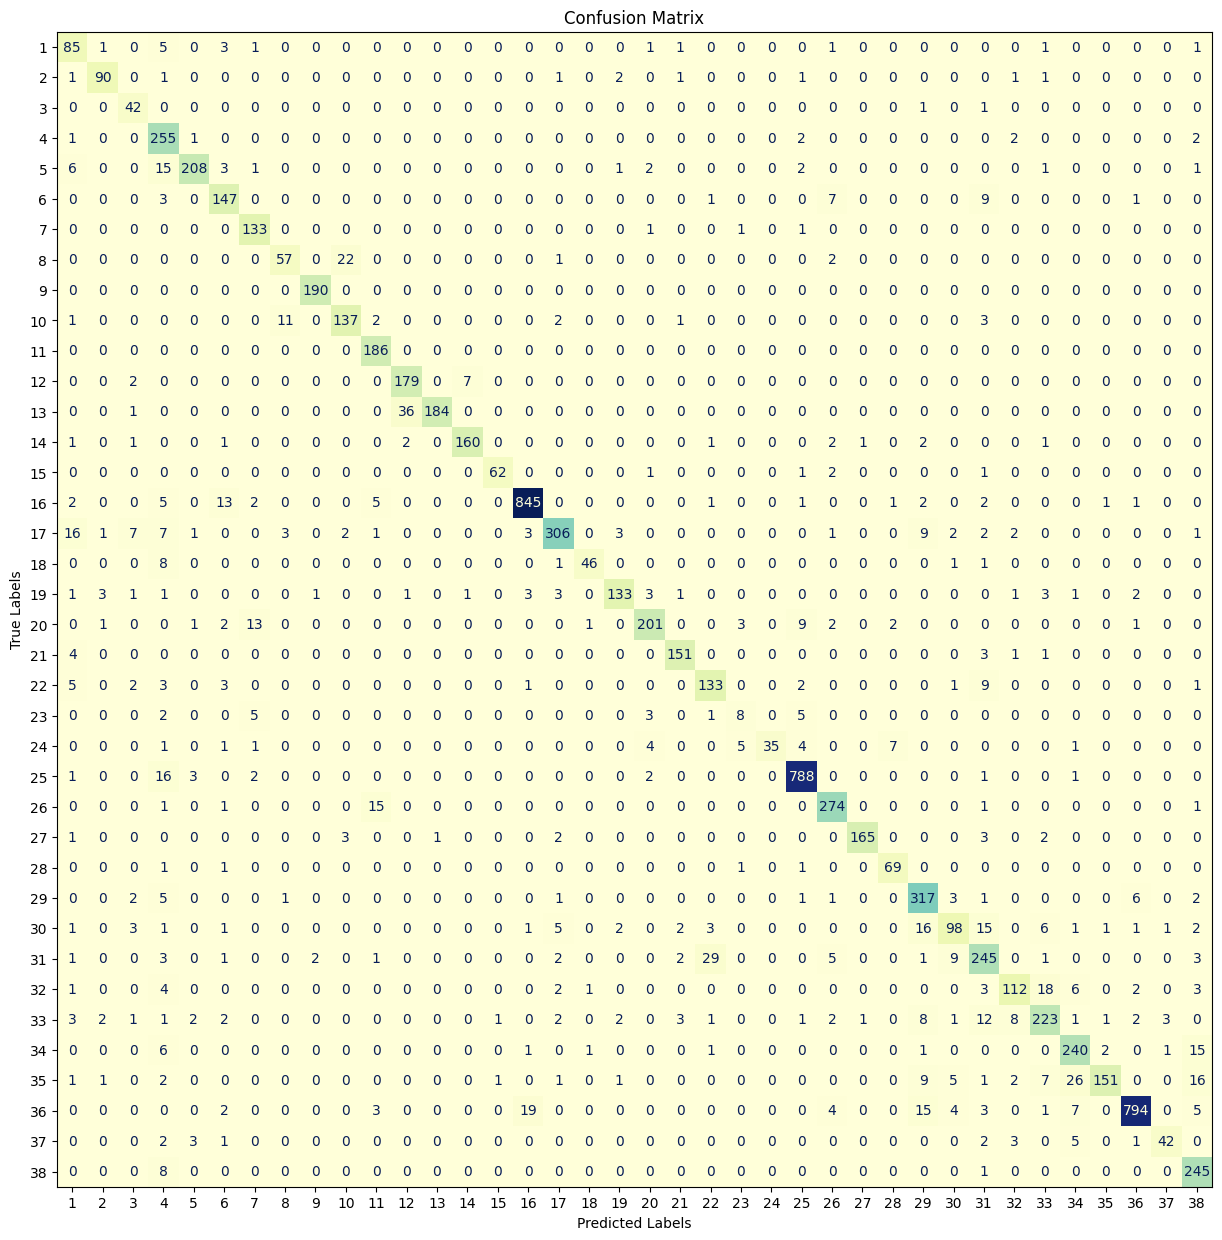

In [ ]:
from sklearn.metrics import precision_score, accuracy_score, recall_score, confusion_matrix, ConfusionMatrixDisplay
plt.figure(figsize= (20,5))
cm = confusion_matrix(labels, predictions)
disp = ConfusionMatrixDisplay(confusion_matrix=cm,
                              display_labels=list(range(1,39)))
fig, ax = plt.subplots(figsize=(15,15))
disp.plot(ax=ax,colorbar= False,cmap = 'YlGnBu')
plt.title("Confusion Matrix")
plt.xlabel('Predicted Labels')
plt.ylabel('True Labels')
plt.show()

### Train on full dataset

In [ ]:
source_folder=valid_data_dir
destination_folder=os.path.join("/content/dataset/dataset","to_augment")
print(destination_folder)
if not os.path.exists(destination_folder):
    os.mkdir(destination_folder)

# Copy all subdirectories from the source folder to the destination folder
for root, dirs, files in os.walk(source_folder):
    for directory in dirs:
        files = os.listdir(f"{source_folder}/{directory}")
        # Copy each file to the destination folder
        # print(directory)
        for file_name in files:
            source_file_path = os.path.join(f"{source_folder}/{directory}", file_name)
            dest_file_path = os.path.join(f"{destination_folder}/{directory}", file_name)
            shutil.copy(source_file_path, dest_file_path)

/content/dataset/dataset/to_augment


In [ ]:
train_data_dir = os.path.join("/content/dataset/dataset","to_augment")
test_data_dir = "/content/dataset/dataset/test"

In [ ]:
train_ds = tf.keras.preprocessing.image_dataset_from_directory(
    train_data_dir,
    batch_size=32,
    image_size=(224,224),
    shuffle=True,
    label_mode="categorical",
    seed = 123 # Set seed for shuffling
)
test_ds = tf.keras.preprocessing.image_dataset_from_directory(
    test_data_dir,  # Use the same directory for validation
    batch_size=32,
    image_size=(224,224),
    shuffle=True,
    label_mode="categorical",
    seed = 123
)

Found 52385 files belonging to 38 classes.
Found 10849 files belonging to 38 classes.


In [ ]:
model = keras.Sequential([
    keras.layers.Rescaling(scale = 1/255 , input_shape =(224,224,3) ) ,

    # keras.layers.Conv2D(256 , (3,3) , activation = 'relu'),
    # keras.layers.MaxPool2D((2,2))                     ,
    # keras.layers.Dropout(0.2),

    keras.layers.Conv2D(128 , (3,3) , activation = 'relu') ,
    keras.layers.MaxPool2D((2,2)) ,
    keras.layers.Dropout(0.2),

    keras.layers.Conv2D(64 , (3,3) , activation = 'relu') ,
    keras.layers.MaxPool2D((2,2)) ,
    keras.layers.Dropout(0.2),

    keras.layers.Conv2D(64 , (3,3) , activation = 'relu') ,
    keras.layers.MaxPool2D((2,2)) ,
    keras.layers.Dropout(0.2),

    keras.layers.Conv2D(32 , (3,3) , activation = 'relu') ,
    keras.layers.MaxPool2D((2,2)) ,

    # fully connected layers

    keras.layers.Flatten(),
    keras.layers.Dense(128,activation = 'relu'),
    keras.layers.Dense(64,activation = 'relu'),
    keras.layers.Dense(38,activation ='softmax')

])
model.compile(
    optimizer = 'adam' ,
    loss = 'categorical_crossentropy',
    metrics = 'accuracy'
)

In [ ]:
history = model.fit(train_ds , epochs = 10)

Epoch 1/10
1638/1638 [==============================] - 392s 238ms/step - loss: 2.2152 - accuracy: 0.3629
Epoch 2/10
1638/1638 [==============================] - 378s 231ms/step - loss: 1.2878 - accuracy: 0.5980
Epoch 3/10
1638/1638 [==============================] - 377s 230ms/step - loss: 1.0667 - accuracy: 0.6602
Epoch 4/10
1638/1638 [==============================] - 376s 229ms/step - loss: 0.9490 - accuracy: 0.6938
Epoch 5/10
1638/1638 [==============================] - 375s 229ms/step - loss: 0.8729 - accuracy: 0.7165
Epoch 6/10
1638/1638 [==============================] - 374s 228ms/step - loss: 0.8218 - accuracy: 0.7322
Epoch 7/10
1638/1638 [==============================] - 374s 228ms/step - loss: 0.7799 - accuracy: 0.7430
Epoch 8/10
1638/1638 [==============================] - 374s 228ms/step - loss: 0.7508 - accuracy: 0.7529
Epoch 9/10
1638/1638 [==============================] - 374s 228ms/step - loss: 0.7225 - accuracy: 0.7606
Epoch 10/10
1638/1638 [=======================

In [ ]:
model.save('model.h5')

/usr/local/lib/python3.10/dist-packages/keras/src/engine/training.py:3103: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


In [ ]:
labels = []
predictions = []
for x,y in test_ds:
    labels.append(list(y.numpy()))
    predictions.append(tf.argmax(model.predict(x, verbose=0),1).numpy())

In [ ]:
predictions = list(itertools.chain.from_iterable(predictions))
labels = list(itertools.chain.from_iterable(labels))

In [ ]:
labels = [list(label).index(1) for label in labels]

In [ ]:
from sklearn.metrics import classification_report
classification_scores = classification_report(labels, predictions)

In [ ]:
print(classification_scores)

              precision    recall  f1-score   support

           0       0.65      0.83      0.73       126
           1       0.99      0.88      0.93       124
           2       0.63      0.67      0.65        55
           3       0.64      0.95      0.77       329
           4       0.89      0.96      0.92       300
           5       0.81      0.88      0.84       210
           6       0.91      0.96      0.93       170
           7       0.62      0.77      0.69       102
           8       0.99      0.94      0.97       238
           9       0.89      0.64      0.75       197
          10       0.98      0.93      0.96       232
          11       0.93      0.86      0.89       236
          12       0.94      0.93      0.94       276
          13       0.96      0.95      0.96       215
          14       0.95      0.92      0.93        84
          15       0.91      0.99      0.95      1101
          16       0.90      0.89      0.90       459
          17       0.83    

<Figure size 2000x500 with 0 Axes>

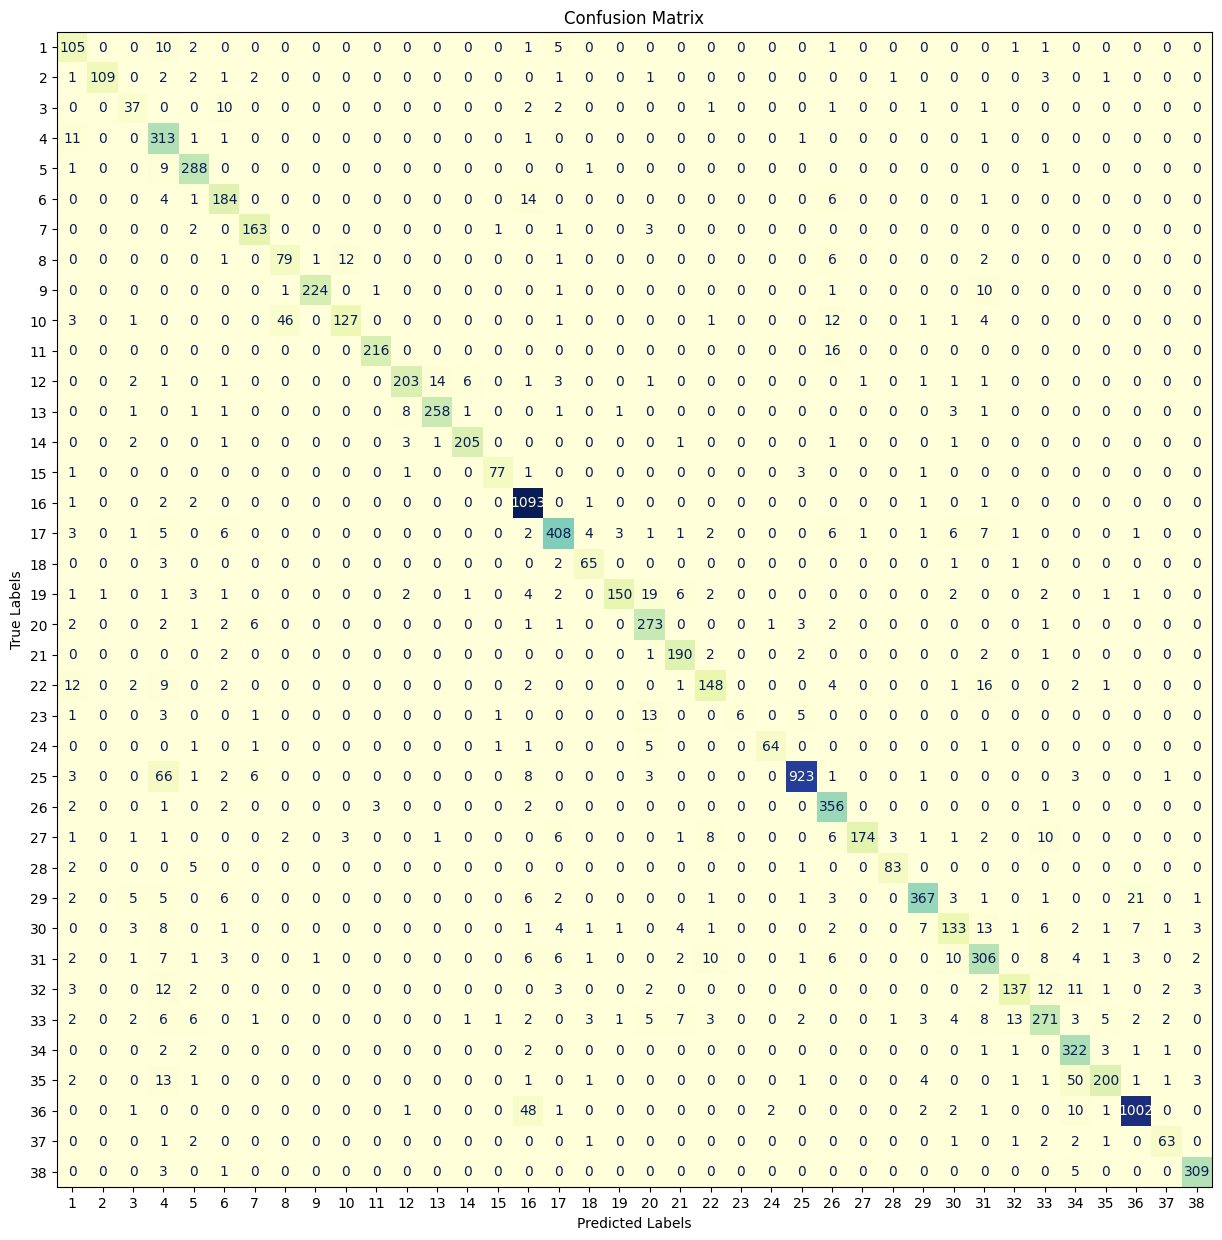

In [ ]:
from sklearn.metrics import precision_score, accuracy_score, recall_score, confusion_matrix, ConfusionMatrixDisplay
plt.figure(figsize= (20,5))
cm = confusion_matrix(labels, predictions)
disp = ConfusionMatrixDisplay(confusion_matrix=cm,
                              display_labels=list(range(1,39)))
fig, ax = plt.subplots(figsize=(15,15))
disp.plot(ax=ax,colorbar= False,cmap = 'YlGnBu')
plt.title("Confusion Matrix")
plt.xlabel('Predicted Labels')
plt.ylabel('True Labels')
plt.show()

In [ ]:
class_names = train_ds.class_names

In [ ]:
class_names

['Apple___Apple_scab',
 'Apple___Black_rot',
 'Apple___Cedar_apple_rust',
 'Apple___healthy',
 'Blueberry___healthy',
 'Cherry_(including_sour)___Powdery_mildew',
 'Cherry_(including_sour)___healthy',
 'Corn_(maize)___Cercospora_leaf_spot Gray_leaf_spot',
 'Corn_(maize)___Common_rust_',
 'Corn_(maize)___Northern_Leaf_Blight',
 'Corn_(maize)___healthy',
 'Grape___Black_rot',
 'Grape___Esca_(Black_Measles)',
 'Grape___Leaf_blight_(Isariopsis_Leaf_Spot)',
 'Grape___healthy',
 'Orange___Haunglongbing_(Citrus_greening)',
 'Peach___Bacterial_spot',
 'Peach___healthy',
 'Pepper,_bell___Bacterial_spot',
 'Pepper,_bell___healthy',
 'Potato___Early_blight',
 'Potato___Late_blight',
 'Potato___healthy',
 'Raspberry___healthy',
 'Soybean___healthy',
 'Squash___Powdery_mildew',
 'Strawberry___Leaf_scorch',
 'Strawberry___healthy',
 'Tomato___Bacterial_spot',
 'Tomato___Early_blight',
 'Tomato___Late_blight',
 'Tomato___Leaf_Mold',
 'Tomato___Septoria_leaf_spot',
 'Tomato___Spider_mites Two-spotted_

In [ ]:
index = []
title = [f'{class_names[24]}', f'{class_names[24]}->{class_names[3]}', f'{class_names[22]}', f'{class_names[22]} -> {class_names[19]}']

pred_class_3 = np.where(np.array(predictions) == 3)
true_class_24 = np.where(np.array(labels) == 24)

true_class_22 = np.where(np.array(labels) == 22)
pred_class_19 = np.where(np.array(predictions) == 19)

index.append(true_class_24[0][0])
low_precision = np.intersect1d(true_class_24, pred_class_3)
index.append(low_precision[0])
index.append(true_class_22[0][0])
low_recall = np.intersect1d(true_class_22, pred_class_19)
index.append(low_recall[0])

In [ ]:
index

[2, 71, 9, 914]

In [ ]:
imgs = []
for x,y in test_ds:
  imgs.append(x)
imgs = list(itertools.chain.from_iterable(imgs))

In [ ]:
imgs[71]

<tf.Tensor: shape=(224, 224, 3), dtype=float32, numpy=
array([[[139.07143  , 147.07143  , 183.07143  ],
        [140.19897  , 148.19897  , 184.19897  ],
        [140.2398   , 148.2398   , 184.2398   ],
        ...,
        [154.79588  , 158.79588  , 193.79588  ],
        [140.10193  , 144.10193  , 179.10193  ],
        [145.11751  , 149.11751  , 184.11751  ]],

       [[139.07143  , 147.07143  , 183.07143  ],
        [140.       , 148.       , 184.       ],
        [139.56633  , 147.56633  , 183.56633  ],
        ...,
        [138.79585  , 142.79585  , 177.79585  ],
        [124.09684  , 128.09683  , 163.09683  ],
        [121.04593  , 125.04593  , 160.04593  ]],

       [[138.35715  , 146.35715  , 182.35715  ],
        [139.36224  , 147.36224  , 183.36224  ],
        [139.05612  , 147.05612  , 183.05612  ],
        ...,
        [137.68881  , 141.68881  , 176.68881  ],
        [139.36736  , 143.36736  , 178.36736  ],
        [136.90811  , 140.90811  , 175.90811  ]],

       ...,

     